In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [15, 10]

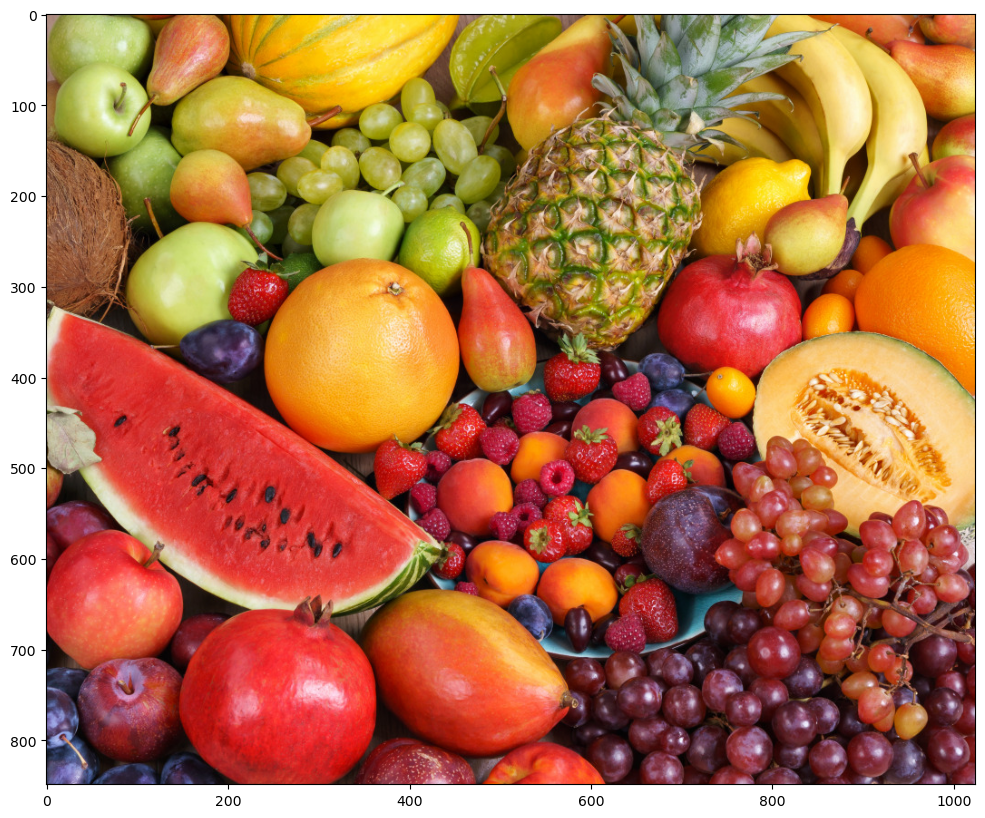

In [2]:
# Load image
img = cv2.imread('C:/Users/user/anaconda3/fruit.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)
plt.show()

In [3]:
# Define color palette: Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

In [4]:
# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest color from the palette (using Euclidean distance)
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        new_pixel = colors[np.argmin(distances)]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel


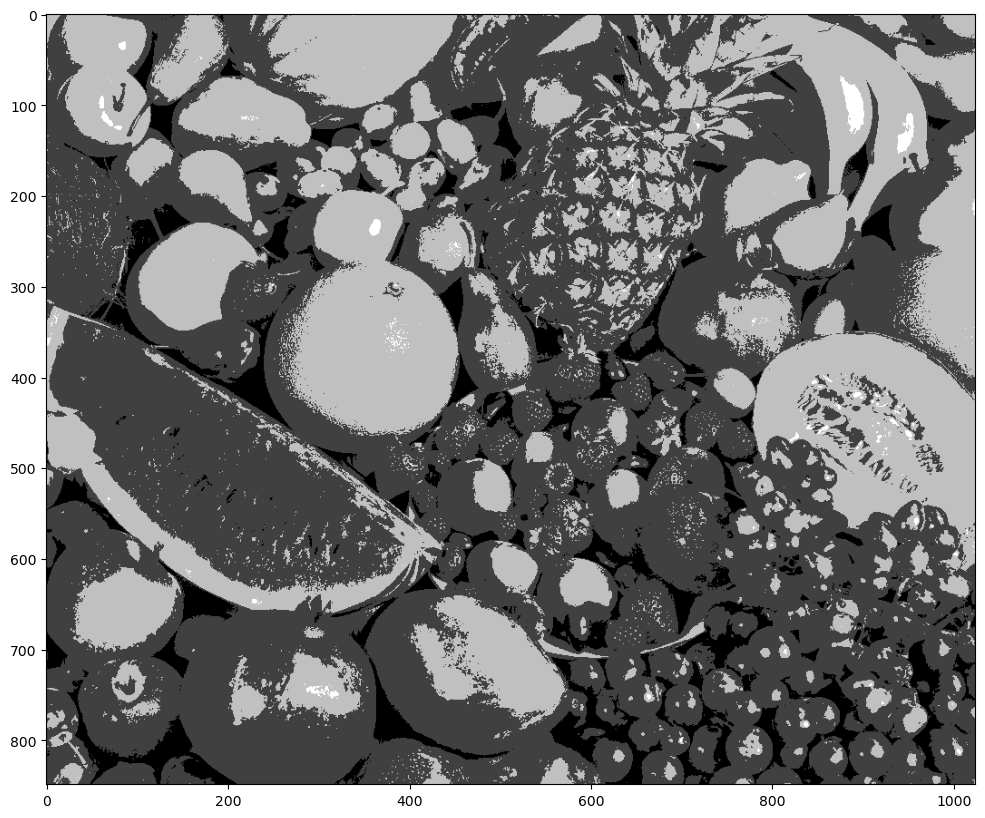

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))
plt.show()

In [6]:
# Compute average quantization error
avg_quant_error = np.mean(np.abs(img - quantized))

# Floyd-Steinberg Dithering
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

In [7]:
for r in range(rows - 1):
    for c in range(1, cols - 1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        
        # Find the closest color from the palette (using Euclidean distance)
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        new_pixel = colors[np.argmin(distances)]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        img_tmp[r, c, :] = new_pixel
        img_tmp[r, c+1, :] += quant_error * 7/16
        img_tmp[r+1, c-1, :] += quant_error * 3/16
        img_tmp[r+1, c, :] += quant_error * 5/16
        img_tmp[r+1, c+1, :] += quant_error * 1/16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

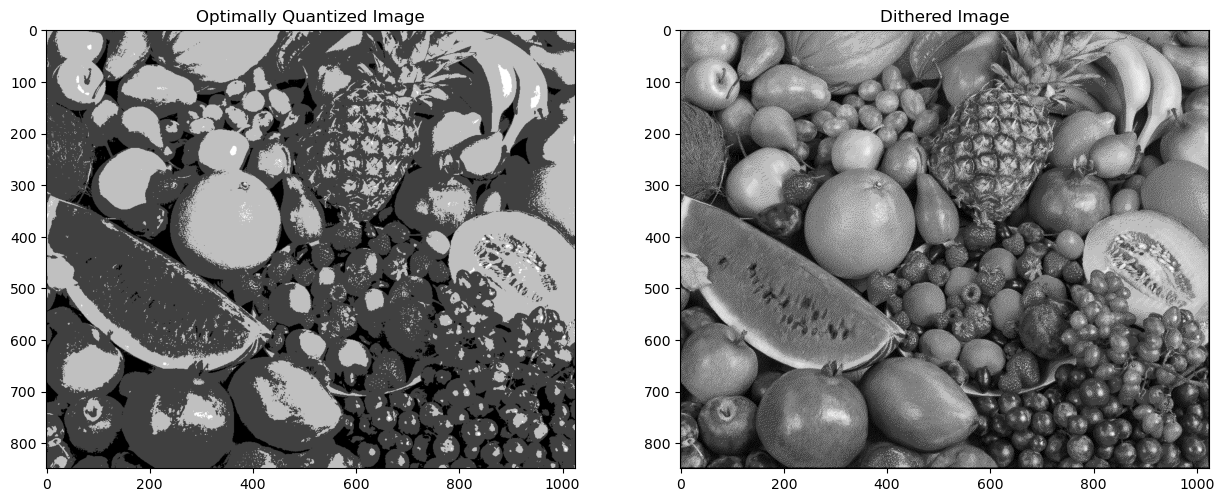

In [8]:
# Show quantized and dithered images
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))
plt.title("Optimally Quantized Image")
plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))
plt.title("Dithered Image")
plt.show()

In [9]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean(np.abs(img - dithering))

print(f"Average quantization error (Optimally Quantized): {avg_quant_error}")
print(f"Average quantization error (Dithered): {avg_dith_error}")

Average quantization error (Optimally Quantized): 51.11935043334961
Average quantization error (Dithered): 57.36299514770508


In [10]:
# Questions
# 1. Which image has higher quantization error? Optimally quantized or dithered?
higher_error_image = "Dithered" if avg_dith_error > avg_quant_error else "Optimally Quantized"
print(f"Higher quantization error: {higher_error_image}")

Higher quantization error: Dithered


In [11]:
# 2. Which image looks better to you?
# The dithered image looks better

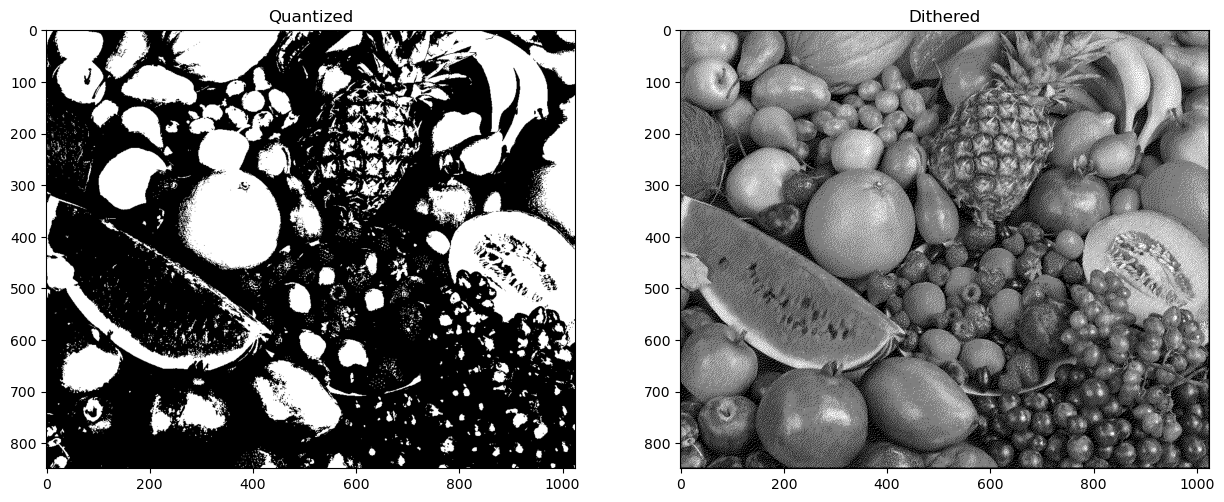

In [15]:
# 3. Can you repeat the same process using only two colours: black and white? Show me :-)
# Define color palette: Black, white
bw_colors = np.array([[0, 0, 0],
                      [255, 255, 255]])
# Apply quantization
bw_quantized = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        distances = np.sqrt(np.sum((bw_colors - pixel) ** 2, axis=1))
        new_pixel = bw_colors[np.argmin(distances)]
        bw_quantized[r, c, :] = new_pixel
        
# Apply Floyd-Steinberg Dithering
bw_img_tmp = np.copy(img)
bw_dithering = np.zeros_like(img)
for r in range(rows - 1):
    for c in range(1, cols - 1):
        pixel = bw_img_tmp[r, c, :]
        distances = np.sqrt(np.sum((bw_colors - pixel) ** 2, axis=1))
        new_pixel = bw_colors[np.argmin(distances)]
        quant_error = pixel - new_pixel
        bw_img_tmp[r, c, :] = new_pixel
        bw_img_tmp[r, c+1, :] += quant_error * 7/16
        bw_img_tmp[r+1, c-1, :] += quant_error * 3/16
        bw_img_tmp[r+1, c, :] += quant_error * 5/16
        bw_img_tmp[r+1, c+1, :] += quant_error * 1/16
        bw_dithering[r, c, :] = new_pixel
        
# Show quantized and dithered images
plt.subplot(121)
plt.imshow(bw_quantized.astype(np.uint8), cmap='gray')
plt.title("Quantized")

plt.subplot(122)
plt.imshow(bw_dithering.astype(np.uint8), cmap='gray')
plt.title("Dithered")
plt.show()

In [31]:
# Bonus Points
# Repeat the homework using a different image palette. For instance, you can use an optimal colour palette that we can calculate via k-means algorithm.

# Reshape the image data for clustering
img_data = img.reshape(-1, 3)

kmeans = KMeans(n_clusters=16, random_state=0).fit(img_data)
optimal_colors = kmeans.cluster_centers_

In [32]:
# Apply quantization using the optimal colors
optimal_quantized = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        distances = np.sqrt(np.sum((optimal_colors - pixel) ** 2, axis=1))
        new_pixel = optimal_colors[np.argmin(distances)]
        optimal_quantized[r, c, :] = new_pixel

In [33]:
# Apply Floyd-Steinberg Dithering using optimal colors
opt_img_tmp = np.copy(img)
opt_dithering = np.zeros_like(img)
for r in range(rows - 1):
    for c in range(1, cols - 1):
        pixel = opt_img_tmp[r, c, :]
        distances = np.sqrt(np.sum((optimal_colors - pixel) ** 2, axis=1))
        new_pixel = optimal_colors[np.argmin(distances)]
        quant_error = pixel - new_pixel
        opt_img_tmp[r, c, :] = new_pixel
        opt_img_tmp[r, c+1, :] += quant_error * 7/16
        opt_img_tmp[r+1, c-1, :] += quant_error * 3/16
        opt_img_tmp[r+1, c, :] += quant_error * 5/16
        opt_img_tmp[r+1, c+1, :] += quant_error * 1/16
        opt_dithering[r, c, :] = new_pixel

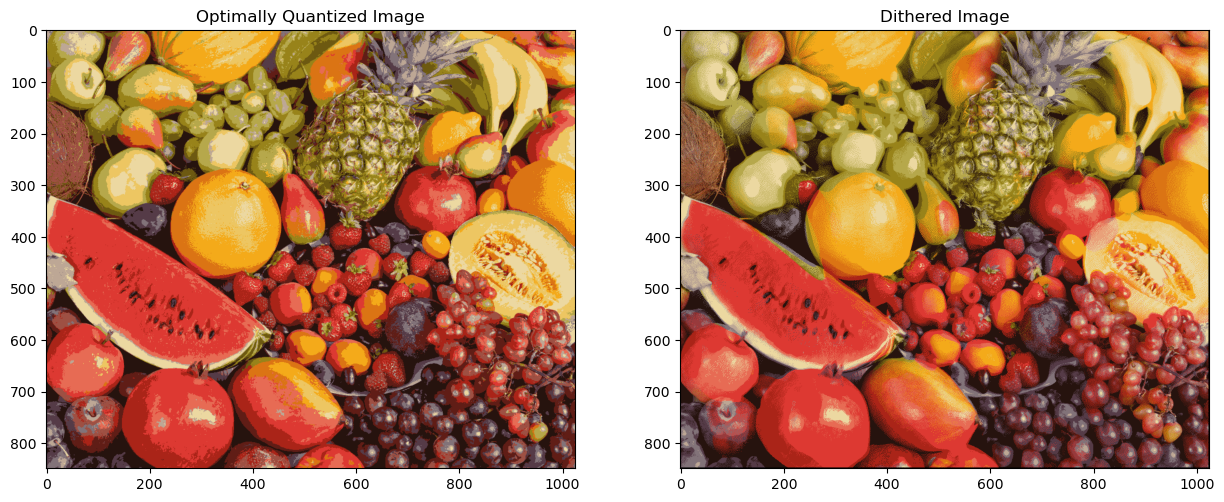

In [34]:
# Show quantized and dithered images with optimal colors
plt.subplot(121)
plt.imshow(optimal_quantized.astype(np.uint8))
plt.title("Optimally Quantized Image")

plt.subplot(122)
plt.imshow(opt_dithering.astype(np.uint8))
plt.title("Dithered Image")
plt.show()

In [38]:
# Questions
#1.How does the result look like to you?
#Dithering improves subjective perception, making color transitions smoother.

#2. What happens if we use 32 colours?
#The image quality improves noticeably, and details become clearer.

#3. What happens if we use 256 colours?
#The image becomes almost indistinguishable from the original, with very high accuracy in color and detail representation.